## Project IMHOTEP
### Plot SSS difference of each IMHOTEP experiment with experiment  GAI (full runoffs variability) 
(S-GAI, GA-GAI, AI-GAI, GI-GAI) 
* This  notebook reads IMHOTEP outputs on JeanZay@IDRIS (here SSS at  yearly frequency).
* A linear detrending is applied first on the SSS, then the difference is computed an dplotted between two IMHOTEP exp.
* Plots are created of the trends and of the difference year by year.
* To illustrate why the detrending is needed, the last plots shows the time-mean difference if computed with or without detrending. With no detrending, there are systematic biases between the experiments.
* This notebook runs on machine JeanZay@ IDIRS on the prepost partition using: 

```
>> module load climate_science/
>> salloc --account bcn@cpu --ntasks=1 --cpus-per-task=5 --partition=prepost --hint=nomultithread --time=01:00:00 srun --pty bash
>> idrlab  # to launch a jupyter server
```


#### Import modules

In [1]:
## standart libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import cartopy.feature as cfeature


# custom tools for plotting
import lib_SLXtools_IMHOTEP_2021 as slx

import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


## print  package version:

In [2]:
# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


## Read IMHOTEP data
* Where to access the data:

In [3]:
prefix = "eORCA025.L75-IMHOTEP"
nexp = "GAI"
nexpREF = "S"
varna = 'sosaline'

# years to read data from:
y1='1980'
y2='2018'


fo="1y" # output frequency


#  input directory on store
diridref="/gpfsstore/rech/bcn/rcli002/eORCA025.L75/"+prefix+"."+nexpREF+"-S/"
diridat="/gpfsstore/rech/bcn/rcli002/eORCA025.L75/"+prefix+"."+nexp+"-S/"

# input directory on work
diri="/gpfswork/rech/bcn/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfsscratch/rech/bcn/regi915/PLT/"

* read files:

In [4]:
# read grid files
tmask = xr.open_dataset(diri+'mesh_hgr.nc')['tmask'][0,0,:,:]
nav_lon = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lon']
nav_lat = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lat']

# file list
sssfiles = diridat+fo+"/????/"+prefix+"."+nexp+"*gridTsurf.nc"
sssfilesREF = diridref+fo+"/????/"+prefix+"."+nexpREF+"*gridTsurf.nc"

# read data we read only from year 1997 to 2007 to compare to GAIa analysis
sss1y = xr.open_mfdataset(sssfiles,concat_dim='time_counter',decode_times=True)[varna].sel(time_counter=slice(y1,y2))

# we read only from year 1997 to 2007 to compare to run GAIa
sss1y_ref = xr.open_mfdataset(sssfilesREF,concat_dim='time_counter',decode_times=True)[varna].sel(time_counter=slice(y1,y2))


## Compute linear trend and remove it from yearly timeseries

In [5]:
# compute linear trend
xrtrends,xrorigins,years = slx.trpolyfit(sss1y,'yr')
xrtrends_ref,xrorigins_ref,years_ref = slx.trpolyfit(sss1y_ref,'yr')


# retrieve trend  timeseries
sss1y_tr = slx.trseries(xrtrends,xrorigins,years,sss1y.time_counter)
sss1y_ref_tr = slx.trseries(xrtrends_ref,xrorigins_ref,years_ref,sss1y_ref.time_counter)


# retrieve detrended timeseries
sss1y_dt = sss1y - sss1y_tr
sss1y_ref_dt = sss1y_ref - sss1y_ref_tr

### Define a few pgridpoints in Pacific and Indian ocean for example

In [6]:
# define points

# 0N, 180
gp1=[429,684]

print(nav_lon.isel(x=gp1[0],y=gp1[1]).values)
print(nav_lat.isel(x=gp1[0],y=gp1[1]).values)

# 100E,-7S
gp2=[109,656]

print(nav_lon.isel(x=gp2[0],y=gp2[1]).values)
print(nav_lat.isel(x=gp2[0],y=gp2[1]).values)

# 55E-1S
gp="gp3"
gp3=[1369,680]

print(nav_lon.isel(x=gp3[0],y=gp3[1]).values)
print(nav_lat.isel(x=gp3[0],y=gp3[1]).values)

180.0
0.0
100.0
-6.9826508
55.0
-0.9999492


## As a check, quick look at the SSS trends at these 3 gridpoints:

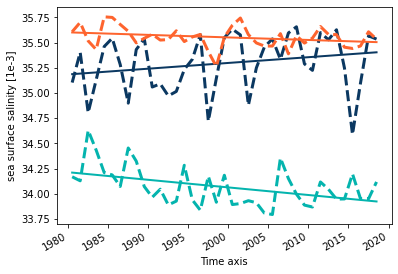

In [8]:
# plot

colors=['#0B3861','#04B4AE','#FE642E']
ico=-1

for gp in ["gp1", "gp2","gp3"]:
    ico = ico+1
#for gp in ["gp3"]:    
    if (gp=="gp1"):
        xl=gp1[0]
        yl=gp1[1]   
    
    if (gp=="gp2"):
        xl=gp2[0]
        yl=gp2[1]
                
    if (gp=="gp3"):
        xl=gp3[0]
        yl=gp3[1]

    sss1y_tr.isel(x=xl,y=yl).plot(color=colors[ico],linestyle='-',linewidth=2)
    #sss1y_dt.isel(x=xl,y=yl).plot()
    sss1y.isel(x=xl,y=yl).plot(color=colors[ico],linestyle='--',linewidth=3)   
    

## plot trend maps

* first experiment:

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


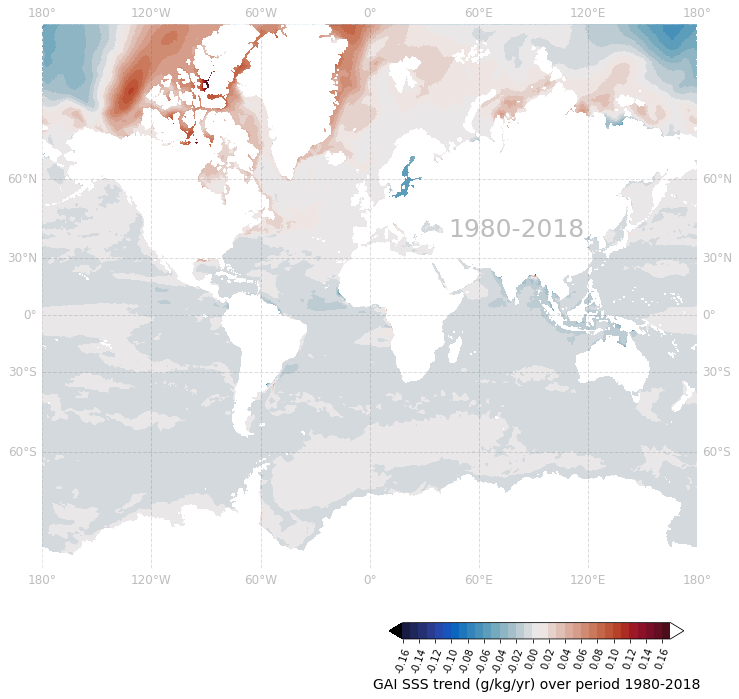

In [7]:
loncentr=0

minlat=-80.0
maxlat=83.0
minlon= -180
maxlon=179

loncentr=0
gridl=False
incrgridlon=60
incrgridlat=30

data2plot = xrtrends.where(tmask!=0,1000).squeeze()

namo = "JZmapGLO_SSStrend_"+fo+"_"+nexp+"_"+y1+"-"+y2


lon2plot   = nav_lon.squeeze()
lat2plot   = nav_lat.squeeze()


#========= Plot settings ===============
levbounds=[-0.16,0.18,0.01]

# customed colormapls
cmap,norm = slx.mycolormap(levbounds,cm_base=cmocean.cm.balance,cu='k',co='w')

fig3 = plt.figure(figsize=([18,10]),facecolor='white')

# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

ax = plt.axes(projection= ccrs.Mercator(central_longitude=loncentr,min_latitude=minlat, max_latitude=maxlat, globe=None))
cs  = plt.pcolormesh(lon2plot, lat2plot, data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)

m2plt= tmask.where(tmask==0)
cs2  = plt.pcolormesh(lon2plot, lat2plot, m2plt, shading='flat',cmap='binary',transform=trdata)

transform = trdata._as_mpl_transform(ax)

plt.annotate(y1+"-"+y2,xy=(43,40),xycoords=transform, color='#BDBDBD',size=25,zorder=10)


# coastlines and gridlines
#cl = ax.coastlines(color= '#BDBDBD')
gl =ax.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.2, linestyle='--')

label_style = {'size': 12, 'color': '#BDBDBD', 'weight': 'normal'}
gl.xlabel_style = label_style
#gl.xlabels_bottom = False
gl.ylabel_style = label_style
#gl.ylabels_right = False

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axis('off')

#global map>> comment on: ax.set_extent([minlon, maxlon, minlat, maxlat])

cbon=True

if cbon:
        tlabel=nexp+" SSS trend (g/kg/yr) over period "+y1+"-"+y2
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=2,tformat="%.2f",
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(0.08, -0.3,0.9,0.2))  

plt.show()

# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,namo,dpifig=200)
plt.close(fig3)


* second experiment:

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


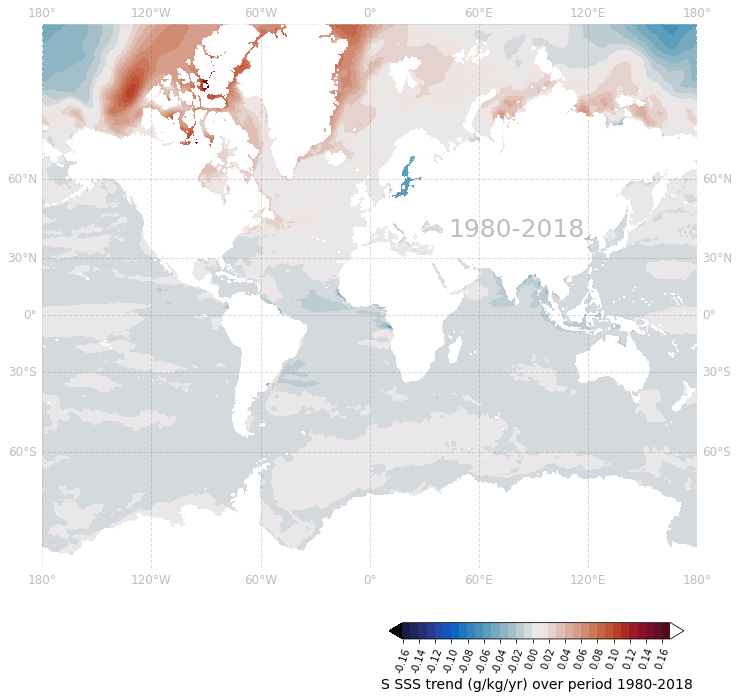

In [8]:
loncentr=0

minlat=-80.0
maxlat=83.0
minlon= -180
maxlon=179

loncentr=0
gridl=False
incrgridlon=60
incrgridlat=30

data2plot = xrtrends_ref.where(tmask!=0,1000).squeeze()

namo = "JZmapGLO_SSStrend_"+fo+"_"+nexpREF+"_"+y1+"-"+y2


lon2plot   = nav_lon.squeeze()
lat2plot   = nav_lat.squeeze()


#========= Plot settings ===============
levbounds=[-0.16,0.18,0.01]

# customed colormapls
cmap,norm = slx.mycolormap(levbounds,cm_base=cmocean.cm.balance,cu='k',co='w')

fig3 = plt.figure(figsize=([18,10]),facecolor='white')

# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

ax = plt.axes(projection= ccrs.Mercator(central_longitude=loncentr,min_latitude=minlat, max_latitude=maxlat, globe=None))
cs  = plt.pcolormesh(lon2plot, lat2plot, data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)

m2plt= tmask.where(tmask==0)
cs2  = plt.pcolormesh(lon2plot, lat2plot, m2plt, shading='flat',cmap='binary',transform=trdata)


transform = trdata._as_mpl_transform(ax)

plt.annotate(y1+"-"+y2,xy=(43,40),xycoords=transform, color='#BDBDBD',size=25,zorder=10)


# coastlines and gridlines
#cl = ax.coastlines(color= '#BDBDBD')
gl =ax.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.2, linestyle='--')

label_style = {'size': 12, 'color': '#BDBDBD', 'weight': 'normal'}
gl.xlabel_style = label_style
#gl.xlabels_bottom = False
gl.ylabel_style = label_style
#gl.ylabels_right = False

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axis('off')

#global map>> comment on: ax.set_extent([minlon, maxlon, minlat, maxlat])

cbon=True

if cbon:
        tlabel=nexpREF+" SSS trend (g/kg/yr) over period "+y1+"-"+y2
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=2,tformat="%.2f",
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(0.08, -0.3,0.9,0.2))  

plt.show()

# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,namo,dpifig=200)
plt.close(fig3)


## Compute SSS difference between the  experiments (after detrending)

In [6]:

diff = sss1y - sss1y_ref
diff_dt = sss1y_dt - sss1y_ref_dt

diff = diff.where(tmask!=0).compute()
diff_dt = diff_dt.where(tmask!=0).compute()


## Plot global maps of the difference in SSS between two experiments, year by year

In [10]:
loncentr=0

minlat=-80.0
maxlat=83.0
minlon= -180
maxlon=179

loncentr=0
gridl=False
incrgridlon=60
incrgridlat=30

timediff = diff_dt.time_counter

#for it in range(0,1):
for it in range(0,diff_dt.time_counter.size):
    if it<10:
        itt="00"+str(it)
    else:
        itt="0"+str(it)

    data2plot = diff_dt.isel(time_counter=it)
    data2plot = data2plot.where(tmask!=0,1000).squeeze()

    namo = "JZmapGLO_SSSdiffdt_"+fo+"_"+nexpREF+"_"+y1+"-"+y2+"_"+str(itt)


    pltyr = slx.printdatestringF(timediff.to_index(),it,'year')
    
    lon2plot   = nav_lon.squeeze()
    lat2plot   = nav_lat.squeeze()


    #========= Plot settings ===============
    levbounds=[-1.5,1.55,0.05]

    # customed colormapls
    cmap,norm = slx.mycolormap(levbounds,cm_base=cmocean.cm.balance,cu='k',co='k')

    fig3 = plt.figure(figsize=([18,10]),facecolor='white')

    # Data system proj (if coords are in lat lon, use PlateCarre here)
    trdata  = ccrs.PlateCarree() 

    ax = plt.axes(projection= ccrs.Mercator(central_longitude=loncentr,min_latitude=minlat, max_latitude=maxlat, globe=None))
    cs  = plt.pcolormesh(lon2plot, lat2plot, data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)
    
    m2plt= tmask.where(tmask==0)
    cs2  = plt.pcolormesh(lon2plot, lat2plot, m2plt, shading='flat',cmap='binary',transform=trdata)
    
    transform = trdata._as_mpl_transform(ax)
    
    plt.annotate(pltyr,xy=(60,40),xycoords=transform, color='#BDBDBD',size=25,zorder=10)


    # coastlines and gridlines
    #cl = ax.coastlines(color= '#BDBDBD')
    gl =ax.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.2, linestyle='--')

    label_style = {'size': 12, 'color': '#BDBDBD', 'weight': 'normal'}
    gl.xlabel_style = label_style
    #gl.xlabels_bottom = False
    gl.ylabel_style = label_style
    #gl.ylabels_right = False

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')

    #global map>> comment on: ax.set_extent([minlon, maxlon, minlat, maxlat])

    cbon=True

    if cbon:
            tlabel="SSS_"+nexp+" - SSS_"+nexpREF+" (g/kg)"
            cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=5,tformat="%.2f",
                                 tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                                bbta=(0.08, -0.3,0.9,0.2))  

    #plt.show()

    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=200)
    plt.close(fig3)


/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/gpfslocalsup/pub/anac

## As a check: plot time-mean difference if computed from the data without detrending
To illustrate why the detrending is needed, the two plots below show the time-mean difference if computed with or without detrending. With no detrending, there are systematic biases between the experiments.

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


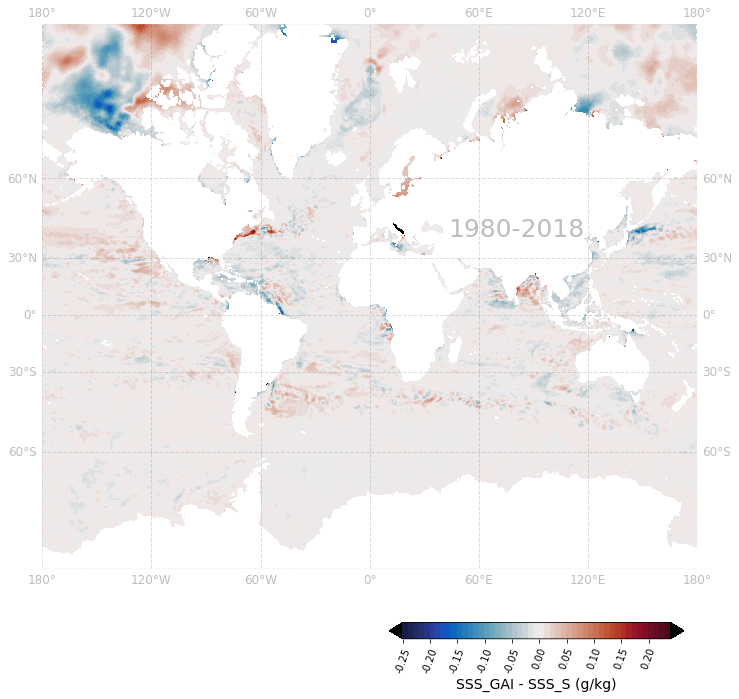

In [7]:
loncentr=0

minlat=-80.0
maxlat=83.0
minlon= -180
maxlon=179

loncentr=0
gridl=False
incrgridlon=60
incrgridlat=30


data2plot = diff.mean(dim='time_counter')

data2plot = data2plot.where(tmask!=0,0).squeeze()

namo = "JZmapGLO_SSSdiff_"+fo+"_"+nexpREF+"_MEANover_"+y1+"-"+y2

pltyr = y1+"-"+y2


lon2plot   = nav_lon.squeeze()
lat2plot   = nav_lat.squeeze()


#========= Plot settings ===============
levbounds=[-0.25,0.25,0.01]

# customed colormapls
cmap,norm = slx.mycolormap(levbounds,cm_base=cmocean.cm.balance,cu='k',co='k')

fig3 = plt.figure(figsize=([18,10]),facecolor='white')

# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

ax = plt.axes(projection= ccrs.Mercator(central_longitude=loncentr,min_latitude=minlat, max_latitude=maxlat, globe=None))
cs  = plt.pcolormesh(lon2plot, lat2plot, data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


m2plt= tmask.where(tmask==0)
cs2  = plt.pcolormesh(lon2plot, lat2plot, m2plt, shading='flat',cmap='binary',transform=trdata)

transform = trdata._as_mpl_transform(ax)

plt.annotate(pltyr,xy=(43,40),xycoords=transform, color='#BDBDBD',size=25,zorder=10)


# coastlines and gridlines
#cl = ax.coastlines(color= '#BDBDBD')
gl =ax.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.2, linestyle='--')

label_style = {'size': 12, 'color': '#BDBDBD', 'weight': 'normal'}
gl.xlabel_style = label_style
#gl.xlabels_bottom = False
gl.ylabel_style = label_style
#gl.ylabels_right = False

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axis('off')

#global map>> comment on: ax.set_extent([minlon, maxlon, minlat, maxlat])

cbon=True

if cbon:
        tlabel="SSS_"+nexp+" - SSS_"+nexpREF+" (g/kg)"
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=5,tformat="%.2f",
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(0.08, -0.3,0.9,0.2))  

plt.show()

# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,namo,dpifig=300)
plt.close(fig3)


## plot mean difference if computed after trend removed from each experiment

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


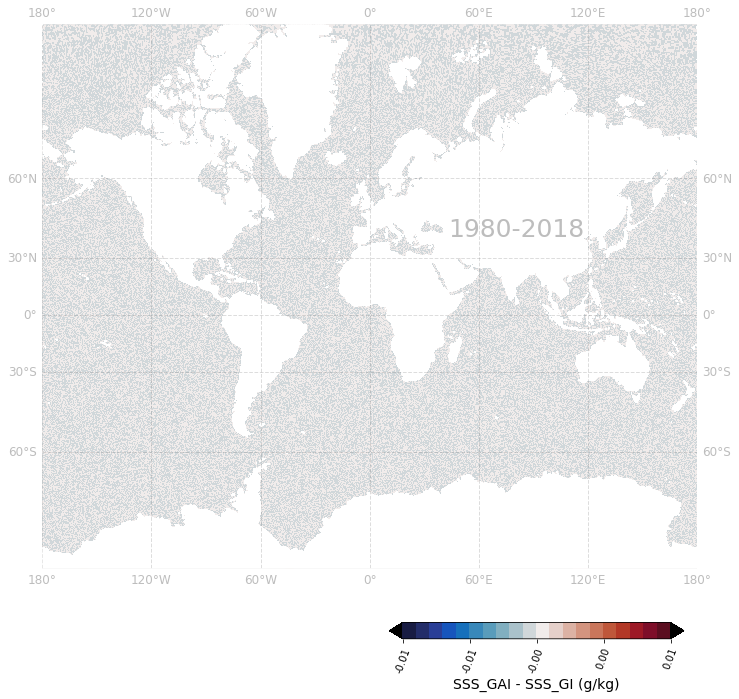

In [21]:
loncentr=0

minlat=-80.0
maxlat=83.0
minlon= -180
maxlon=179

loncentr=0
gridl=False
incrgridlon=60
incrgridlat=30


data2plot = diff_dt.mean(dim='time_counter')

data2plot = data2plot.where(tmask!=0,0).squeeze()

namo = "JZmapGLO_SSSdiffdt_"+fo+"_"+nexp+"_MEANover_"+y1+"-"+y2

pltyr = y1+"-"+y2


lon2plot   = nav_lon.squeeze()
lat2plot   = nav_lat.squeeze()


#========= Plot settings ===============
levbounds=[-0.01,0.011,0.001]

# customed colormapls
cmap,norm = slx.mycolormap(levbounds,cm_base=cmocean.cm.balance,cu='k',co='k')

fig3 = plt.figure(figsize=([18,10]),facecolor='white')

# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

ax = plt.axes(projection= ccrs.Mercator(central_longitude=loncentr,min_latitude=minlat, max_latitude=maxlat, globe=None))
cs  = plt.pcolormesh(lon2plot, lat2plot, data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


m2plt= tmask.where(tmask==0)
cs2  = plt.pcolormesh(lon2plot, lat2plot, m2plt, shading='flat',cmap='binary',transform=trdata)

transform = trdata._as_mpl_transform(ax)

plt.annotate(pltyr,xy=(43,40),xycoords=transform, color='#BDBDBD',size=25,zorder=10)


# coastlines and gridlines
#cl = ax.coastlines(color= '#BDBDBD')
gl =ax.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.2, linestyle='--')

label_style = {'size': 12, 'color': '#BDBDBD', 'weight': 'normal'}
gl.xlabel_style = label_style
#gl.xlabels_bottom = False
gl.ylabel_style = label_style
#gl.ylabels_right = False

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axis('off')

#global map>> comment on: ax.set_extent([minlon, maxlon, minlat, maxlat])

cbon=True

if cbon:
        tlabel="SSS_"+nexp+" - SSS_"+nexpREF+" (g/kg)"
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=5,tformat="%.2f",
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(0.08, -0.3,0.9,0.2))  

plt.show()

# Save fig in png, resolution dpi    
slx.saveplt(fig3,diro,namo,dpifig=300)
plt.close(fig3)
